In [4]:
from fastai import *
from fastai.vision import *

In [5]:
path = "chest_xray/"
print(path)

chest_xray/


In [6]:
# set the batch size for SGD
bs = 64

In [7]:
# create a data bunch
np.random.seed(42) #why do we do this?
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(do_flip=False), 
                                  size=224, 
                                  bs=bs, 
                                  valid_pct=0.2).normalize(imagenet_stats)

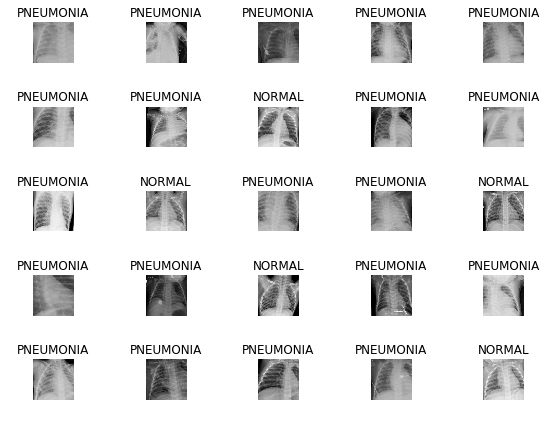

In [8]:
# display 3 rows of data
data.show_batch(rows=5, figsize=(8,6))

In [9]:
# verify the classes
print(data.classes)
len(data.classes),data.c

['NORMAL', 'PNEUMONIA']


(2, 2)

In [10]:
len(data.classes)

2

In [11]:
# create a neural network
learn = create_cnn(data, models.resnet34, metrics=error_rate, model_dir="/tmp/model/")

In [12]:
# fit 4 layers
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.381740,0.197073,0.067464
2,0.239021,0.181951,0.065756
3,0.191254,0.143774,0.052092
4,0.161135,0.122737,0.047822


In [13]:
# interpret the results
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

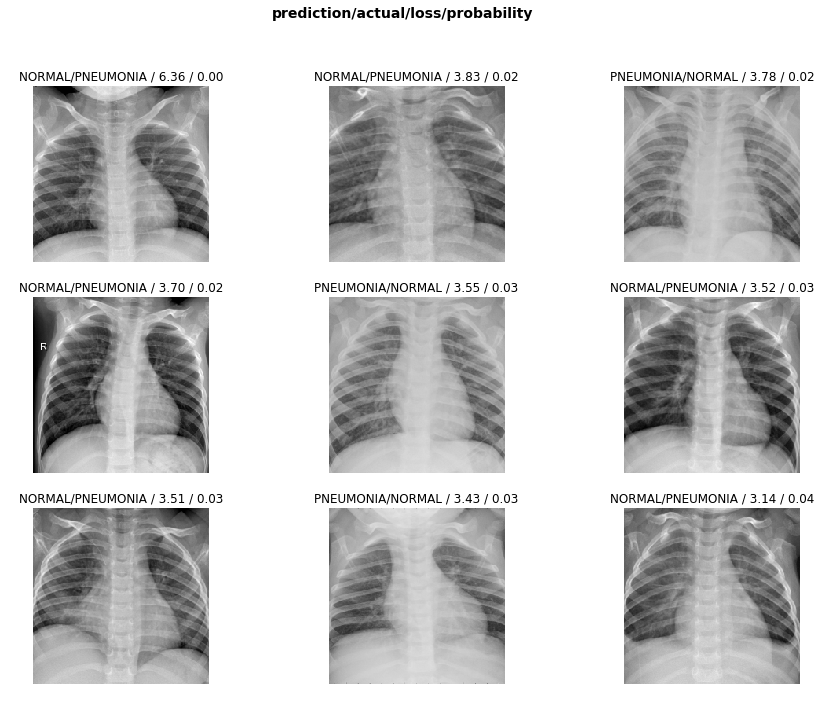

In [14]:
# plot the top losses
interp.plot_top_losses(9, figsize=(15,11))

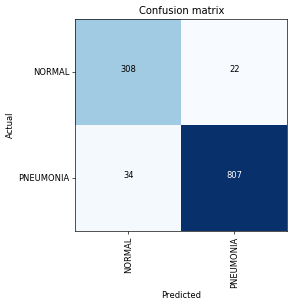

In [15]:
# plot the confusion matrix
interp.plot_confusion_matrix(figsize=(5,5), dpi=60)

In [16]:
learn.save('stage-1')

In [17]:
learn.unfreeze()

In [18]:
#need to lookup what this is doing now
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate
1,0.147252,0.090710,0.033305


In [19]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [20]:
learn.save("model", return_path=True)

PosixPath('/tmp/model/model.pth')

In [21]:
pwd

'/home/paperspace/kaggle/chest-xray-pneumonia'

In [22]:
savepath = '/home/paperspace/kaggle/chest-xray-pneumonia/model'

In [23]:
learn.save(savepath, return_path=True)

PosixPath('/home/paperspace/kaggle/chest-xray-pneumonia/model.pth')

In [24]:
exportpath = '/home/paperspace/kaggle/chest-xray-pneumonia/export'

In [25]:
learn.export(exportpath)

In [27]:
data

ImageDataBunch;

Train: LabelList
y: CategoryList (4685 items)
[Category NORMAL, Category NORMAL, Category NORMAL, Category NORMAL, Category NORMAL]...
Path: chest_xray
x: ImageItemList (4685 items)
[Image (3, 1416, 1776), Image (3, 1416, 1736), Image (3, 1225, 1632), Image (3, 1104, 1328), Image (3, 928, 1288)]...
Path: chest_xray;

Valid: LabelList
y: CategoryList (1171 items)
[Category PNEUMONIA, Category PNEUMONIA, Category NORMAL, Category NORMAL, Category NORMAL]...
Path: chest_xray
x: ImageItemList (1171 items)
[Image (3, 680, 1032), Image (3, 656, 1104), Image (3, 1167, 1414), Image (3, 1318, 1754), Image (3, 1222, 1728)]...
Path: chest_xray;

Test: None

In [28]:
from io import BytesIO

In [37]:
img_path = 'chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg'

In [38]:
img = open_image(img_path)

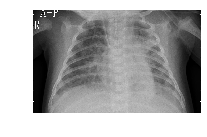

In [39]:
img.show()

In [40]:
class_,predictions, losses = learn.predict(img)

In [41]:
class_

Category PNEUMONIA

In [47]:
predictions

tensor(1)

In [43]:
losses

tensor([0.0037, 0.9963])

In [48]:
type(class_)

fastai.core.Category

In [49]:
type(predictions)

torch.Tensor

In [50]:
type(losses)

torch.Tensor

In [52]:
class_.data

tensor(1)

In [53]:
class_.show

<bound method ItemBase.show of Category PNEUMONIA>

In [54]:
class_.obj

'PNEUMONIA'

In [55]:
type(class_.obj)

str